In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('churn1.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
df.shape

(3333, 21)

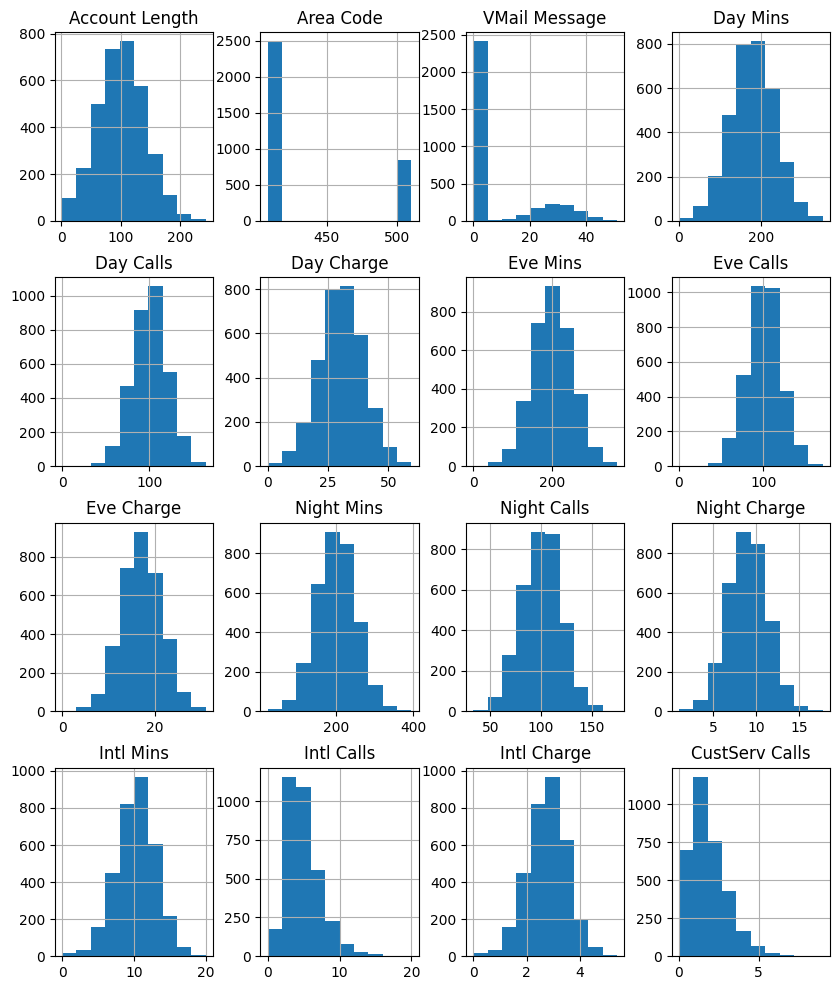

In [4]:
df.hist(figsize = (10, 12));

In [8]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

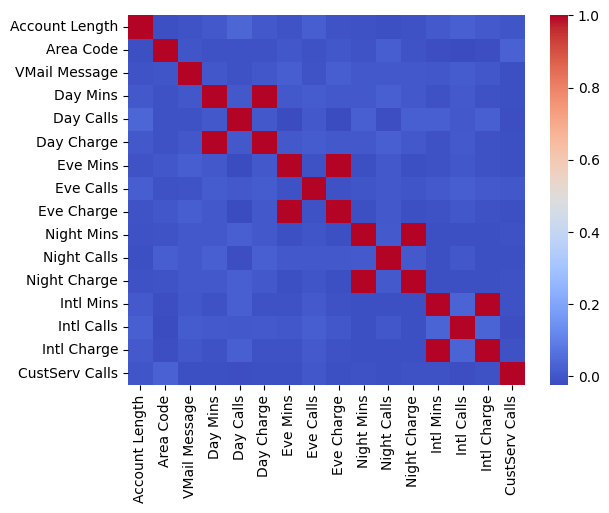

In [12]:
#Check for collinearity
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm');

* There seems to be some multicollinearity between some columns. This may be removed since they wont be necessary for making predictions.

In [13]:
df_drop_mins = df.drop(df.filter(like='Mins'), axis=1)

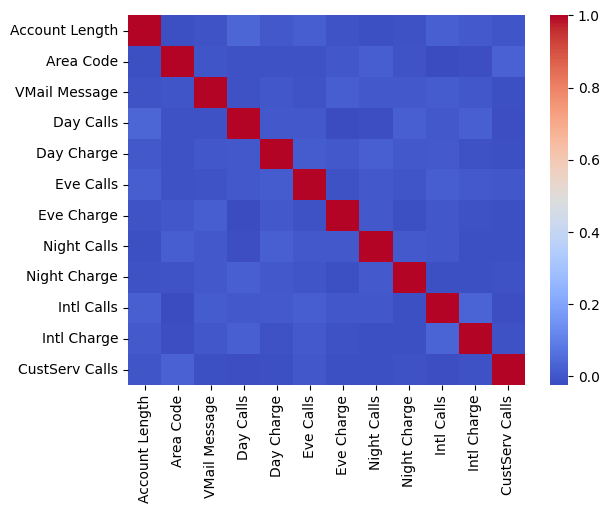

In [14]:
sns.heatmap(df_drop_mins.corr(numeric_only=True), cmap='coolwarm');

In [15]:
df_drop_mins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Calls       3333 non-null   int64  
 8   Day Charge      3333 non-null   float64
 9   Eve Calls       3333 non-null   int64  
 10  Eve Charge      3333 non-null   float64
 11  Night Calls     3333 non-null   int64  
 12  Night Charge    3333 non-null   float64
 13  Intl Calls      3333 non-null   int64  
 14  Intl Charge     3333 non-null   float64
 15  CustServ Calls  3333 non-null   int64  
 16  Churn?          3333 non-null   object 
dtypes: float64(4), int64(8), object(5

In [19]:
df_drop_mins.groupby('State').mean(numeric_only=True)

,Account Length,Area Code,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls
State,,,,,,,,,,,,
AK,97.192308,438.692308,9.057692,95.269231,30.325769,96.576923,15.664231,97.346154,8.654808,4.807692,2.705385,1.557692
AL,98.025000,430.625000,7.175000,99.100000,31.621500,98.462500,16.614500,98.612500,8.427875,4.700000,2.779000,1.562500
AR,96.981818,439.254545,7.200000,102.145455,29.940000,97.836364,17.089636,99.054545,9.245818,4.690909,2.800727,1.981818
AZ,100.468750,432.656250,9.468750,100.109375,29.173125,102.406250,15.958906,99.984375,8.730625,4.859375,2.870625,1.593750
CA,99.235294,441.500000,9.000000,104.500000,31.206176,103.088235,16.913529,99.205882,8.932941,4.441176,2.665588,1.470588
CO,102.545455,429.621212,8.363636,95.121212,30.381818,98.166667,17.584848,97.060606,8.546061,4.106061,2.665758,1.787879
CT,99.040541,429.608108,9.067568,98.432432,29.774324,99.121622,17.325946,102.283784,9.270405,4.108108,2.713378,1.513514
DC,105.722222,436.055556,9.740741,100.166667,29.135370,101.981481,16.684074,97.666667,9.285741,3.907407,2.864630,1.351852
DE,101.918033,439.983607,6.967213,98.639344,29.680164,97.360656,17.701311,101.213115,9.175574,4.295082,2.778361,1.622951


# Churn Prediction

In [52]:
X = df_drop_mins.drop(['Churn?'], axis=1)
y = df_drop_mins['Churn?']

In [53]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Select relevant features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse=False, handle_unknown='error'), ["Int'l Plan", 'VMail Plan'])])

In [56]:
# Apply preprocessing to both X_train and X_test
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

C:\Users\olubu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [59]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_preprocessed, y_train)

# Step 7: Model Evaluation
y_pred = rf_model.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.945


'from sklearn.linear_model import LogisticRegression\nmodel = LogisticRegression()'

In [63]:
# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_preprocessed, y_train)

best_model = grid_search.best_estimator_

In [64]:
# Step 7: Model Evaluation
y_pred = best_model.predict(X_test_preprocessed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.945
Classification Report:
              precision    recall  f1-score   support

      False.       0.95      0.99      0.97       857
       True.       0.94      0.66      0.77       143

    accuracy                           0.94      1000
   macro avg       0.94      0.83      0.87      1000
weighted avg       0.94      0.94      0.94      1000

Confusion Matrix:
[[851   6]
 [ 49  94]]
